In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the data

df= pd.read_csv('Mall_Customers.csv')

In [3]:
# Having a look at first five rows in the dataset

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Finding the number of columns and rows

df.shape

(200, 5)

In [5]:
# Getting some information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# Checking for missing values

df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
# choosing the needed columns

x= df.iloc[:, [3,4]].values

In [8]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

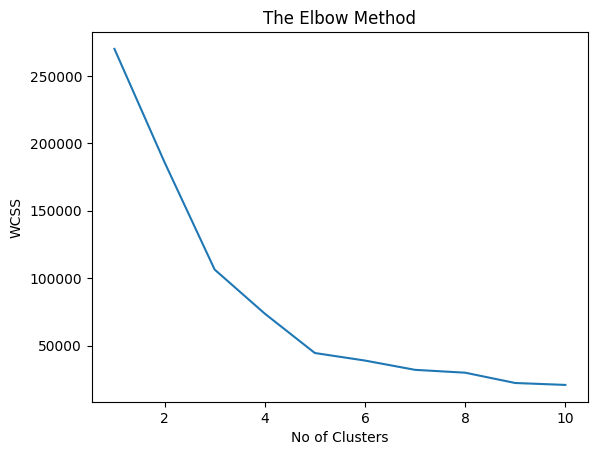

In [9]:
# Importing cluster algorithm from sklearn library

from sklearn.cluster import KMeans

# Try the values from 1 to 10 to find the optimal number of cluster

wcss=[]
for i in range(1, 11):
    kmeans= KMeans(n_clusters= i, random_state= 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Plot an Elbow graph

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
# Apply KMeans using scikit learn
kmeans= KMeans(n_clusters= 5, random_state= 0)

# Return a label for each data point based on their cluster
y= kmeans.fit_predict(x)

# Retrieve the cluster labels and centroids
labels= kmeans.labels_
centroids= kmeans.cluster_centers_

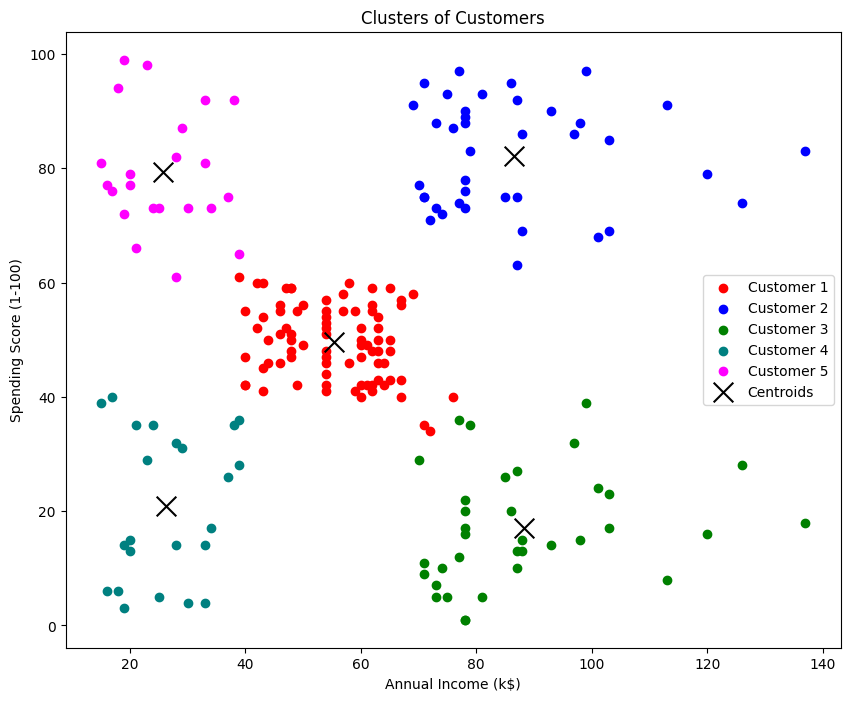

In [11]:
# Visualize the results

plt.figure(figsize= (10, 8))
colors= ['red', 'blue', 'green', 'teal', 'magenta']
for i in range(5):
    cluster= x[labels== i]
    
    # Plotting all the clusters on their centroids
    plt.scatter(cluster[:, 0], cluster[:, 1], c= colors[i], label= f'Customer {i+1}')
    
# Plotting the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s= 200, c= 'black',marker= 'x', label= 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()


# creating function for user input
def get_user_input():
    
    # Taking user input for Age, Annual Income, and Spending Score
    annual_income = float(input("Enter your Annual Income (in k): "))
    spending_score = float(input("Enter your Spending Score (1-100): "))
    
    # Create a DataFrame for the user input
    user_data = pd.DataFrame([[annual_income, spending_score]], columns=['Annual Income (k)', 'Spending Score (1-100)'])
    
    # Standardize the user input using the same scaler
    user_data_scaled = scaler.fit_transform(user_data)
    
    # Predict the cluster using the trained K-means model
    cluster = kmeans.predict(user_data_scaled)
    
    return cluster[0]

get_user_input()

Enter your Annual Income (in k):  70
Enter your Spending Score (1-100):  60


3

From the prediction, 3 comes under the cluster of 'High Income and Low Spending Score'.